---
title: "4.7 Case Study: Robot Configuration Transformations"
subject: Orthogonality
subtitle: Modeling rigid body transformations
short_title: "4.7 Case Study: Robot Configuration Transformations"
authors:
  - name: Nikolai Matni
    affiliations:
      - Dept. of Electrical and Systems Engineering
      - University of Pennsylvania
    email: nmatni@seas.upenn.edu
license: CC-BY-4.0
keywords: nodes, edges, Kirchoff's law
math:
  '\vv': '\mathbf{#1}'
  '\bm': '\begin{bmatrix}'
  '\em': '\end{bmatrix}'
  '\R': '\mathbb{R}'
---

## Learning Objectives

By the end of this page, you should know:
- how to express the position and orientation of an object with respect to a reference frame
- how to change reference frames of an object using linear transformations

When we consider the motion of an object in the world, we need to keep track of the object's position and its orientation. To keep track of these, it is necessary to define a *frame of reference* which we can express the position and orientation with respect to. In the below figure, if we consider the quadrotor as the object, the fixed world frame (sometimes called inertial frame) is our frame of reference.
```{image} frame_of_ref.png
```
In this case study, we will consider an environment consisting of both a ground vehicle, and a camera. We will suppose that the ground vehicle is driving on a level surface, but the camera is mounted on a drone which is circling the environment. Our goal in this case study will be to depict the ground vehicle's motion from the perspective of the drone. 
``` {image} car_and_drone.png
```

Our approach will be to first express the position and orientation of both the ground vehicle and the camera with respect to a fixed reference frame, called the *world frame*. We will create paths of both the ground vehicle and the aerial camera with respect to this world frame. Finally, by applying the tools of this chapter, we will be able to express the position and orientation of the ground vehicle with respect to the aerial camera. 

Let's first express the camera relative to the world frame. To do so, we will need to consider the position of the camera relative to the world frame, and the direction which it is pointing. The position can be represented as a translation consisting of three components. Because we will later have multiple reference frames, it is important to denote that this translation is with respect to the world frame. We will use $W$ to denote the world frame, and $C$ to denote the camera frame. This translation will thus be expressed as 
$$ ^W \vv t_C \in \R^3.$$
To express the orientation of the camera, we will assign three axes to the camera frame. The $x$-axis of the camera frame is the direction that the camera will point. The $y$ axis will be the horizontal view from the camera, and the $z$ axis will be the vertical view from the camera, as below 
```{image} camera_frame.png
```
We can express the orientation of the camera frame as a rotation of of world frame. In particular, we can consider the angles by which we would have to rotate the world frame about its $x$, $y$, and $z$ axes to have it align with the camera frame. The rotations about each of these axes is known as euler angles. As discussed in [this example](./053-orthogonal_matrices.ipynb#orthogonal-matrices-ex1), the rotation of a 2D vector through an angle $\theta$ can be achieved via multiplication with the $2\times 2$ orthogonal matrix
$$
\bm \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \em. 
$$
To express rotations in 3 dimensions, we can express the composition of three simple two dimensional rotations, as below:
```{image} 2d_rotations.png
```
In particular, we can denote the rotation about the $x$ axis as $\theta_x$, the $y$ axis as $\theta_y$, and the $z$ axis as $\theta_z$. Using the expressions for the rotations of a vector in 2 dimensions, we find that we can express each of these simple rotations as 3x3 orthogonal matrices:
$$
 R_x = \bm 1 & 0 & 0 \\ 0 & \cos(\theta_x) & -\sin(\theta_x) \\ 0 & \sin(\theta_x) & \cos(\theta_x) \em, R_y = \bm  cos(\theta_y) & 0 & \sin(\theta_y) \\ 0 & 1 & 0 \\ -\sin(\theta_y) & 0 & \cos(\theta_y) \em, R_z = \bm \cos(\theta_z) & -\sin(\theta_z) & 0 \\ \sin(\theta_z) & \cos(\theta_z) & 0 \\ 0 & 0 & 1 \em.  
$$
Then the rotation achieved by first rotating about the $x$ axis by $\theta_x$, then rotating about the $y$ axis by $\theta_y$, and finally rotating about the $z$ axis by $\theta_z$ can be expressed as the product of these three matrices: 
$$
 R = R_z R_y R_x.
$$
It turns out that any rotation in three dimensions can be expressed in this form. By the property that the product of two orthogonal matrices is orthogonal, it holds that like in two dimensions, rotations in three dimensions are expressed by orthogonal $3\times 3$ matrices. 

Let's define a camera frame which has translation
$$
    ^W \vv t_C = \bm 4 \\ 0 \\ 2 \em
$$
and rotation with $\theta_x = \theta_y =0$ and $\theta_z = \pi/2$, or 
$$
    ^W R_C = \bm 0 & -1 & 0 \\ 1 & 0 & 0 \\ 0 & 0 & 1 \em. 
$$
Below, we define this coordinate frame along with a function to plot the reference frame in world coordinates. 

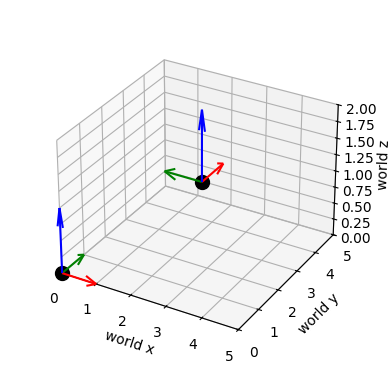

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_reference_frame(translation_vector, rotation_matrix, ax=None):
    """
    Plots a 3D coordinate system based on the given translation vector and rotation matrix.
    
    Parameters:
        translation_vector (numpy array): A 3-element array [tx, ty, tz] representing the translation vector.
        rotation_matrix (numpy array): A 3x3 matrix representing the rotation matrix.
        ax (matplotlib axes object, optional): A matplotlib 3D axes object. If None, a new figure and axes will be created.
    """
    if ax is None:
        fig = plt.figure()
        ax = fig.add_subplot(111, projection='3d')

    # Define origin and axes
    origin = np.array(translation_vector)
    x_axis = origin + rotation_matrix[:, 0]
    y_axis = origin + rotation_matrix[:, 1]
    z_axis = origin + rotation_matrix[:, 2]

    # Plot the origin
    ax.scatter(*origin, color='k', s=100)

    # Plot the axes
    ax.quiver(*origin, *rotation_matrix[:, 0], length=1, color='r', label='X axis')
    ax.quiver(*origin, *rotation_matrix[:, 1], length=1, color='g', label='Y axis')
    ax.quiver(*origin, *rotation_matrix[:, 2], length=1, color='b', label='Z axis')

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

#plot world frame
world_translation = np.zeros(3)
world_rotation = np.eye(3)
plot_reference_frame(world_translation, world_rotation, ax)

#plot camera frame
camera_translation = np.array([4,0,2])
camera_rotation = np.array([[0, -1, 0], [1, 0, 0], [0, 0, 1]])
plot_reference_frame(camera_translation, camera_rotation, ax)

ax.set_xlim(0, 5)
ax.set_ylim(0, 5)
ax.set_zlim(0, 2)

ax.set_xlabel('world x')
ax.set_ylabel('world y')
ax.set_zlabel('world z', fontsize=10)
ax.set_box_aspect(aspect=None, zoom=0.85)

plt.show()

Examining the result, we see that we have plotted the world frame in the lower left which is aligned with the coordinates of the plot, and the camera frame which is rotated $90^\circ$ about the $z$-axis from the world frame, shifted along the $x$ axis by $4$, and shifted upwards by $2$. Below, we will develop a path of camera frames representing the camera position and orientation as the drone flies over time. We will suppose that the drone flies in a circle of radius four centered at the origin of the world frame, and starting from an initial position $\bm 4 \\ 0 \\ 2\em$. The height will remain constant throughout the flight. During flight, the drone will rotate so that the camera is always pointing towards the $z$ axis of the world frame, and angled down by $22.5^\circ$. The circle will take place over a span of $500$ timesteps of duration $0.02$. We will then animate the trajectory of the camera frame. 

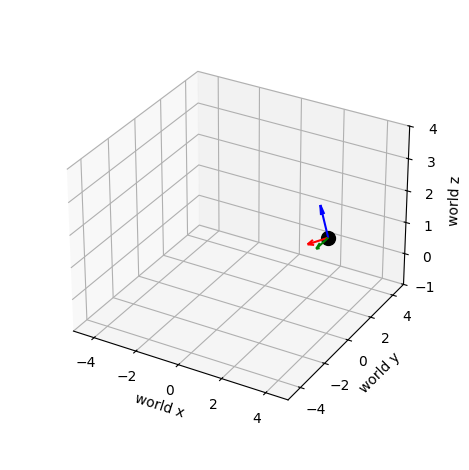

In [3]:
from matplotlib import animation

camera_frames = []

n_frames = 500
for k in range(n_frames):
    camera_x_pos = 4*np.cos(k/n_frames*(2*np.pi))
    camera_y_pos = 4*np.sin(k/n_frames*(2*np.pi))
    camera_theta_z = np.pi + 2*np.pi*k/n_frames
    camera_theta_y = np.pi/8
    
    camera_translation = np.array([camera_x_pos, camera_y_pos, 2])

    #define rotation as product of the y-axis rotation and z axis rotation
    camera_rotation=np.array([
        [np.cos(camera_theta_z), -np.sin(camera_theta_z), 0],
        [np.sin(camera_theta_z), np.cos(camera_theta_z), 0],
        [0, 0, 1]
    ])@np.array([
        [np.cos(camera_theta_y), 0, np.sin(camera_theta_y)],
        [0, 1, 0],
        [-np.sin(camera_theta_y), 0, np.cos(camera_theta_y)]
    ])
    camera_frames.append((camera_translation, camera_rotation))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

def update(frame):
    ax.clear()
    plot_reference_frame(camera_frames[frame][0], camera_frames[frame][1], ax)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-1, 4)
    ax.set_xlabel('world x')
    ax.set_ylabel('world y')
    ax.set_zlabel('world z', fontsize=10)
    ax.set_box_aspect(aspect=None, zoom=0.85)
    
    fig.tight_layout()


ani = animation.FuncAnimation(fig=fig, func=update, frames=n_frames, interval=30)
ani.save(filename="camera_motion.gif", writer="pillow")

The motion of the camera is illustrated below.
```{image} camera_motion.gif
```

Let us now define the translation and rotation of our ground vehicle. As with the camera, the orientation of the ground vehicle will be described using a translation and a rotation. To denote that it is the ground vehicle, we will use the subscipt $G$. In particular, we will have a translation relative to the world frame
$
^W \vv t_G 
$ and a rotation relative to the world frame $^W R_G$. The ground vehicle will remain flat on the ground with a height of zero. It's path will therefore be determined by the $x$-position, $y$-position, and the direction that it is pointing on the plane determined by the $x$ and $y$ axes. We will consider the position and orientation of the ground vehicle for 10 seconds discretized into intervals of 0.02 seconds. Therefore, we will obtain $500$ distinct positions and orientations of the groud vehicle. From one timestep to the next, the ground vehicle will move at a fixed speed of 1.5 meters/second in whatever direction the ground vehicle is pointing at that time. The direction will evolve as the previous direction, plus some steering command. These dynamics are defined below and simulated with a sinusoidal steering command and starting from the initial position $x, y=(-4,-2)$, and orientation $\theta=0$. The $x$-position, $y$-position, and orientation of the ground vehicle over the $10$ second interval are plotted below.


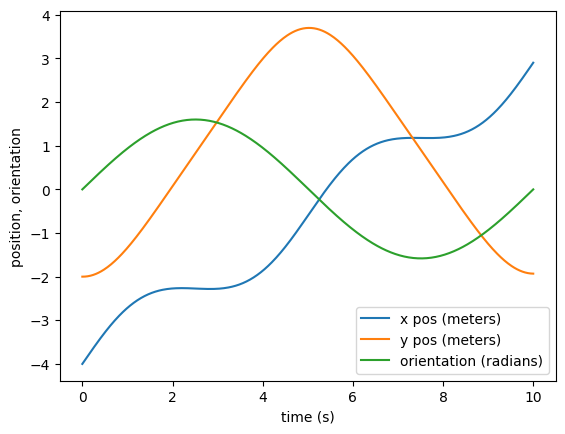

In [4]:
dt = 0.02

def vehicle_dynamics(state,control):
    x, y, theta = state
    v, tau = control
    return np.array([x+dt*v*np.cos(theta), y+dt*v*np.sin(theta), theta + tau])

T = 500
states = np.zeros((T+1, 3))
states[0] = np.array([-4, -2, 0])
controls = np.stack([1.5*np.ones(T), 0.02*np.cos(2*np.pi/500*np.arange(T))], axis=1)

for t in range(T):
    states[t+1] = vehicle_dynamics(states[t], controls[t])

time = np.arange(0, 10.02, 0.02)
x = states[:,0]
y = states[:,1]
theta = states[:,2]
plt.plot(time, x, label='x pos (meters)')
plt.plot(time, y, label='y pos (meters)')
plt.plot(time, theta, label='orientation (radians)')
plt.xlabel('time (s)')
plt.ylabel('position, orientation')
plt.legend()

We now have the path of our ground vehicle. Just like we did for the camera, let's make a video of how the ground vehicle moves relative to the world frame. To do so, we will express the $x$ and $y$ positions of the vehicle as part of a 3 dimensional translation vector, and the direction the ground vehicle is pointing as a 3x3 rotation matrix:
$$ ^W \vv t_G = \bm x \\ y \\ 0 \em$$ and  $$^W R_G = \bm \cos(\theta) & -\sin(\theta) & 0 \\ \sin(\theta) & \cos(\theta) & 0 \\ 0 & 0 & 1 \em. $$
We will make this video below. 

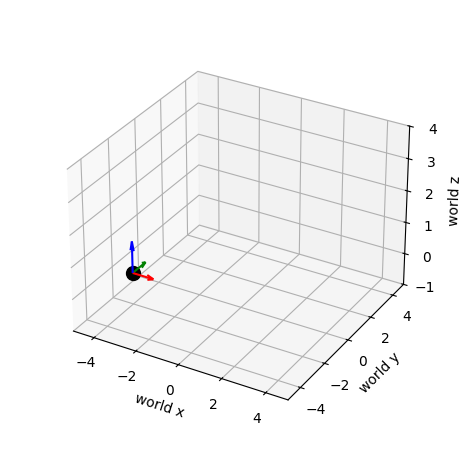

In [5]:
ground_vehicle_frames = []

n_frames = 500
for k in range(n_frames):

    ground_vehicle_translation=np.array([x[k], y[k], 0])
    ground_vehicle_rotation = np.array([
        [np.cos(theta[k]), -np.sin(theta[k]), 0],
        [np.sin(theta[k]), np.cos(theta[k]), 0],
        [0, 0, 1]
    ])
    ground_vehicle_frames.append((ground_vehicle_translation, ground_vehicle_rotation))

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")


def update(frame):
    ax.clear()
    plot_reference_frame(ground_vehicle_frames[frame][0], ground_vehicle_frames[frame][1], ax=ax)
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-1, 4)
    ax.set_xlabel('world x')
    ax.set_ylabel('world y')
    ax.set_zlabel('world z', fontsize=10)
    ax.set_box_aspect(aspect=None, zoom=0.85)
    
    fig.tight_layout()


ani = animation.FuncAnimation(fig=fig, func=update, frames=n_frames, interval=30)
ani.save(filename="vehicle_in_world_frame.gif", writer="pillow")

The motion of the groud vehicle in the world frame is depicted below:
```{image} vehicle_in_world_frame.gif
```

Now that we have the paths of both the camera and the ground vehicle expressed in terms of the world frame, we come to our final step: expressing the ground vehicle in the camera frame. We start from the fact that we have the camera frame relative to the world frame, described by $^W \vv t_C$ and $^W R_C$ and the ground vehicle frame relative to the camera frame described by $^W \vv t_G$ and $^W R_G$. From these translations and rotations, we want to find the translations and rotations of the ground vehicle with respect to the the camera frame, $^C \vv t_G$ and $^C R_G$. Our first step in doing so will be to express the world frame in the coordinates of the camera frame. In particular, we want to use $^W \vv t_C$ and $^W R_C$ to construct $^C \vv t_W$ and $^C R_W$. One way to do so is to view the coordinate frames as a matrix that transforms points of one frame into points of another frame. In particular, if $^C \vv p \in \R^3$ is a vector described in camera frame coordinates, we can express that point in world frame coordinates as $^W \vv p$ via the transformation $^W \vv p = ^W R_C$ $^C \vv p +$  $ ^W \vv t_C$. This may be expressed as a single matrix multiplication by using *homogenous coordinates*. In particular, if we stick a $1$ at the bottom of the vectors $^C \vv p$ and $^W \vv p$, we have that 
\begin{equation}
    \bm ^W \vv p \\ 1\em = \bm ^W R_C & ^W \vv t_C \\ 0 & 1 \em  \bm {^C \vv p} \\ 1 \em.
\end{equation}
The matrix $\bm ^W R_C & ^W \vv t_C \\ 0 & 1 \em$ is full rank by the fact that the first three columns are orthonormal (by the fact that $^W R_C$ is a rotation matrix, and thus orthogonal), and the last column is linearly independent of the first three by the fact that it has a one as the final entry, while the first three columns have a zero as the final entry. Therefore, this matrix is invertible. Then if we have known world frame coordinates $ ^W \vv p$, we can express 
\begin{equation}
    \label{eq:w2c}
\bm ^C \vv p \\ 1\em = \bm ^W R_C & ^W \vv t_C \\ 0 & 1 \em^{-1} \bm {^W \vv p} \\ 1\em = \bm (^W R_C)^\top & - (^W R_C)^\top {^W \vv t_C} \\ 0 & 1 \em  \bm {^W \vv p} \\ 1 \em. 
\end{equation}
**Verify that this is the correct expression for the inverse is correct using the properties of orthogonal matrices!** 

Using the above viewpoint where coordinate frames are transformations, we can use the inverse transformation above to determine 
$^C R_W = ({^W R_C})^\top$ and $^C \vv t_W = - ({^W R_C})^\top {^W \vv t_C}$. The view of the coorindate frames as linear transformations can also help us to understand how to express the ground vehicle frame relative to the camera frame. In particular, [](#eq:w2c) demonstrates how to transform a point in world coordinates to camera coordintes. Similarly, we may use $^W R_G$ and $^W \vv t_G$ to express a point $^G \vv p$ in ground vehicle coordinates in terms of camera coordinates as:
$$
   \bm ^W \vv p \\ 1 \em = \bm ^W R_G & ^W \vv t_G \\ 0 & 1 \em \bm{^G \vv p} \\ 1\em.
$$
By substitution, we find that
\begin{equation}
    \label{eq:g2c}
\bm ^C \vv p \\ 1\em = \bm (^W R_C)^\top & - (^W R_C)^\top {^W \vv t_C} \\ 0 & 1 \em   \bm ^W R_G & ^W \vv t_G \\ 0 & 1 \em \bm {^G \vv p} \\1 \em = \bm (^W R_C)^\top { ^W R_G} & (^W R_C)^\top {^W \vv t_G} - (^W R_C)^\top {^W \vv t_C} \\ 0 & 1 \em \bm {^G \vv p} \\ 1 \em.
\end{equation}
Then we have found the frame expressing our ground vehicle relative to the camera as $^C R_G = (^W R_C)^\top { ^W R_G}$ and $^C \vv t_G = (^W R_C)^\top {^W \vv t_G} - (^W R_C)^\top {^W \vv t_C}$.

Below, we will use the above derivations to convert the sequence camera and vehicle positions and orientations relative to each other into the sequence of positions and orientations of the vehicle relative to the camera. We create a depiction of this movement below. In order to better intuit what is happening in the picture, we also plot several anchors which remain stationary as the camera and ground vehicle move. The anchors have world coordinates $$\bm 4 \\ 0 \\ 0\em, \bm -4 \\ 0 \\ 0 \\ \em, \bm 0 \\ 4 \\ 0 \em, \bm 0 \\ -4 \\ 0 \em, \bm 0 \\ 0 \\ 0 \em.$$

[8.15640312 2.         1.21370839]


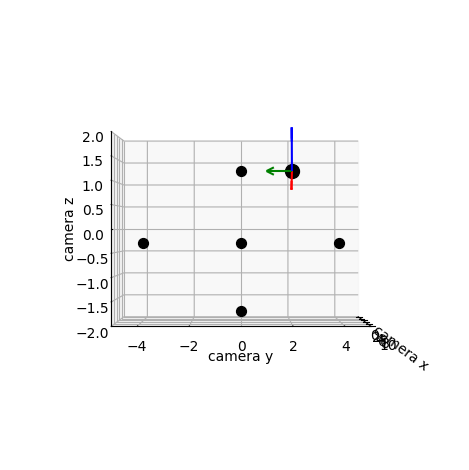

In [6]:
gv_in_camera_frame = []
world_origin_in_camera_frame = [] 
world_boundary_in_camera_frame = [] 

n_frames = 500
for k in range(n_frames):
    cam_trans, cam_rot = camera_frames[k]
    gv_trans, gv_rot = ground_vehicle_frames[k]

    
    gv_in_camera_translation = cam_rot.T@gv_trans - cam_rot.T@cam_trans
    gv_in_camera_rotation = cam_rot.T@gv_rot
    
    gv_in_camera_frame.append((gv_in_camera_translation, gv_in_camera_rotation))

    world_origin_in_camera_frame.append(- cam_rot.T@cam_trans)
    world_boundary_in_camera_frame.append((cam_rot.T@np.array([4,0,0]) - cam_rot.T@cam_trans, 
                                           cam_rot.T@np.array([-4,0,0]) - cam_rot.T@cam_trans,
                                           cam_rot.T@np.array([0,4,0]) - cam_rot.T@cam_trans,
                                           cam_rot.T@np.array([0,-4,0]) - cam_rot.T@cam_trans,
                                          )
                                         )

fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

print(gv_in_camera_frame[0][0])

def update(frame):
    ax.clear()
    plot_reference_frame(gv_in_camera_frame[frame][0], gv_in_camera_frame[frame][1], ax=ax)
    ax.set_xlim(0, 10)
    ax.set_ylim(-5, 5)
    ax.set_zlim(-2, 2)
    ax.set_xlabel('camera x')
    ax.set_ylabel('camera y')
    ax.set_zlabel('camera z')
    ax.scatter(*world_origin_in_camera_frame[frame], color='k', s=50)
    ax.scatter(*world_boundary_in_camera_frame[frame][0], color='k', s=50)
    ax.scatter(*world_boundary_in_camera_frame[frame][1], color='k', s=50)
    ax.scatter(*world_boundary_in_camera_frame[frame][2], color='k', s=50)
    ax.scatter(*world_boundary_in_camera_frame[frame][3], color='k', s=50)
    ax.set_box_aspect(aspect=None, zoom=0.85)
    ax.view_init(elev=0., azim=0)
    fig.tight_layout()


ani = animation.FuncAnimation(fig=fig, func=update, frames=n_frames, interval=30)
ani.save(filename="vehicle_in_camera_frame.gif", writer="pillow")

Let's check out our video! 
``` {image} vehicle_in_camera_frame.gif
```

We have successfully depicted the motion of the ground vehicle relative to the camera! A more advanced rendering could come by replacing our anchors with a landscape of the world. You are encouraged to play with 
* the path of the aerial camera
* the path of the ground vehicle

and determiine if the change in the video is what you expect. 